In [1]:
import keras
from IPython.display import display
import ipywidgets as widgets
from keras import optimizers
from sklearn.utils import shuffle
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import random
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import h5py
import numpy as np
import os
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
#function for printing predictions  
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#done loading the model
#utility function for printing CNN's answer
def prediction(pred):
    if(pred == 0):
        return "MCF-10A"
    elif(pred == 1):
        return "MCF-7"
    else:
        return "MDA-MB-231"
#load input and random shuffle
h5f = h5py.File('g4data.h5','r')
# the data, split between train and test sets
X = np.array(h5f['x_data_images'])
X = X.reshape(-1, 64, 64, 1)
y = np.array(h5f['y_data_images'])
h5f.close()
#get the original images
#load input and random shuffle
h5f = h5py.File('group4data.h5','r')
X2 = np.array(h5f['x_data_images'])
X2 = X2.reshape(-1, 800, 800, 1)
y2 = np.array(h5f['y_data_images'])
h5f.close()

# for i in range(len(X)):
#      print(i)
#      plt.imshow(X[i].reshape(64, 64), interpolation = 'nearest')
#      plt.show()
#      plt.close()
#      plt.imshow(X2[i].reshape(800, 800), interpolation = 'nearest')
#      plt.show()
#      plt.close()

Using TensorFlow backend.


In [2]:
#create GUI environment
# widgets.IntSlider(
#     value=7,
#     min=0,
#     max=10,
#     step=1,
#     description='Test:',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d'
# )


# widgets.IntText(
#     value=7,
#     description='Any:',
#     disabled=False
# )

#LINKING TWO SIMILAR WIDGETS
# a = widgets.FloatText()
# b = widgets.FloatSlider()
# display(a,b)

# mylink = widgets.jslink((a, 'value'), (b, 'value'))

intText = widgets.IntText(value = 0, 
                         description = "Image Index")
intSlider = widgets.IntSlider(value = 0, 
                              min = 0, 
                              max = X.shape[0] - 1, 
                              step =1, 
                              description = "Image Index" , 
                              disabled = False, 
                              continuous_update = True)
ImageLink = widgets.jslink((intText, 'value'), (intSlider, 'value'))

Label(value='')

IntSlider(value=0, description='Image Index', max=551)


Image Index:  286
CNN's prediction:  MCF-10A
Actual Answer:  MCF-10A
Scaled-Down Image: 


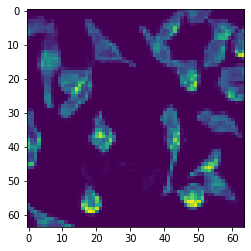

Original Image: 


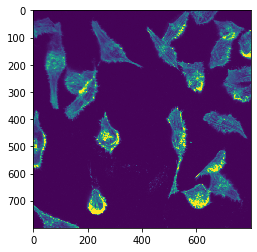


Image Index:  415
CNN's prediction:  MDA-MB-231
Actual Answer:  MDA-MB-231
Scaled-Down Image: 


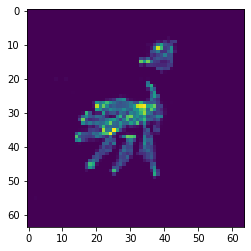

Original Image: 


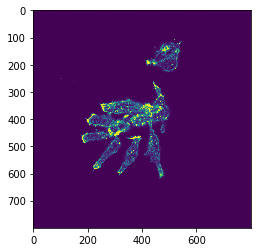

In [3]:
#create interactable user interface
caption = widgets.Label(value='')
def handle_slider_change(change):
    plt.clf()
    caption.value = 'The Image Index is ' + str(intSlider.value)
    print("")
    i = intSlider.value
#     file = open("images/WidgetArch.png", "rb")
#     image = file.read()
#     widgets.Image(
#     value=image,
#     format='png',
#     width=300,
#     height=400,
    print("Image Index: ", str(intSlider.value))
    pred = loaded_model.predict(X[i].reshape(-1, 64, 64, 1))
    (a, b) = max((pred[0][0], 0), (pred[0][1], 1), (pred[0][2], 2))
    print("CNN's prediction: ", prediction(b))
    (x, ans) = max((y[i][0], 0), (y[i][1], 1), (y[i][2], 2))
    print("Actual Answer: ", prediction(ans))
    print("Scaled-Down Image: ")
    plt.imshow(X[i].reshape(64, 64), interpolation = 'nearest')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    print("Original Image: ")
    plt.imshow(X2[i].reshape(800, 800), interpolation = 'nearest')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    
intSlider.observe(handle_slider_change, names='value')
display(caption, intSlider)